In [51]:
from time import sleep
import Pyro5.api 
import matplotlib.pyplot as plt
from TimeTagger import *

In [52]:
# Name of the file we want to read. 
# Remember, "Measurement.ttbin" files read all the files in sequence 'Measurement'
file = "Measurement.ttbin"

In [53]:
fr = FileReader(file)
print("All channels available: {}".format(fr.getChannelList()))

print("Has data? ->", fr.hasData())
# Returns: True if more data is available for reading, False if all data has been read from all the files specified in the class constructor.

All channels available: (1, 2)
Has data? -> True


In [54]:
# Now we are going to print all the configuration of the TT-Ultra at the moment of the measurement
config = fr.getConfiguration()

for key, value in config.items():
    print(f"{key}: {value}")

channel number scheme: 2
configure version: 1
current time: 2024-09-19 12:10:23 +0200
devices: [{'FPGA ID': 11493476189726804, 'PCB UID': '00fdf287', 'PCB version': '1.8 (1)', 'minimum software version': '2.10.6', 'model': 'Time Tagger Ultra', 'serial': '2410001ABQ'}]
firmware version: TT-Ultra, FW6, TS 2024-02-09 12:21:10, OK 1.46
fpga link: {'enabled': False}
hardware buffer size: 67108864
inputs: [{'average rising falling': [False, False], 'channel': [1, -1], 'conditional filter filtered': [False, False], 'conditional filter triggers': [False, False], 'deadtime': [2000, 2000], 'delay hardware': [0, 0], 'delay software': [0, 0], 'event divider': [1, 1], 'hardware delay compensation': [333, 333], 'high priority channel': [False, False], 'input hysteresis': 0, 'input impedance high': False, 'input mux': 0, 'normalization': [True, True], 'resolution': 'Standard', 'resolution rms': 42.0, 'trigger level': 0.5}, {'average rising falling': [False, False], 'channel': [2, -2], 'conditional fi

In [55]:
virtual_tagger = createTimeTaggerVirtual()
virtual_tagger.getConfiguration()

{'configure version': 1,
 'current time': '2024-09-19 12:10:38 +0200',
 'hardware configuration': None,
 'measurements': [],
 'replay speed': -1.0,
 'software clock': None,
 'software version': '2.17.4',
 'virtual inputs': []}


Correlation measurement is running.

Rate of counts channel 1 (counts/sec) : 225262.0
Total counts channel 1 : 225262
Rate of counts channel 2 (counts/sec) : 35262.0
Total counts channel 2 : 35262


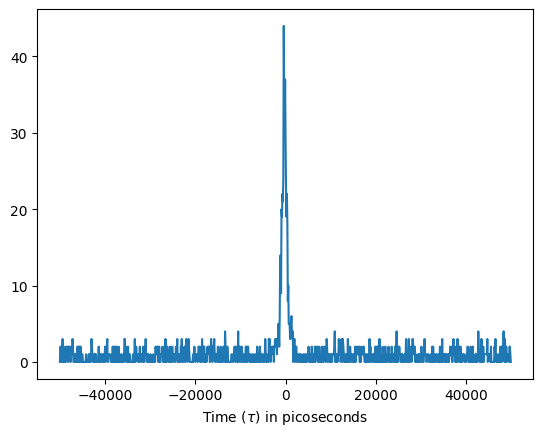

In [57]:
# measure photon antibunching
corr_ch1 = 1 # first photon channel for antibunching measurements
corr_ch2 = 2 # second photon channel for antibunching measurements
bwcorr = 100 # 1 ns
nbins = 1000

corr = Correlation(virtual_tagger, corr_ch1, corr_ch2, bwcorr, nbins)
cr = Countrate(virtual_tagger, [corr_ch1, corr_ch2])
print("\nCorrelation measurement is running.\n")


virtual_tagger.setReplaySpeed(-1.0) # Speed of -1.0 will replay the data as fast as possible
virtual_tagger.replay(file) # collect data until the end (20 sec)
#virtual_tagger.replay(file, duration=10e11) # collect only 1 sec. of data (duration in picoseconds)
virtual_tagger.waitForCompletion()

# normalized correlation -> Photon Antibunching
xcorr = corr.getIndex()
#ycorr = corr.getDataNormalized()
ycorr = corr.getData()

print(f"Rate of counts channel {corr_ch1} (counts/sec) : {cr.getData()[0]}")
print(f"Total counts channel {corr_ch1} : {cr.getCountsTotal()[0]}")
print(f"Rate of counts channel {corr_ch2} (counts/sec) : {cr.getData()[1]}")
print(f"Total counts channel {corr_ch2} : {cr.getCountsTotal()[1]}")

plt.plot(xcorr, ycorr)
plt.xlabel(r'Time ($\tau$) in picoseconds')
plt.show()

### Post-analysis using .npz files

In [58]:
import numpy as np

data = np.load("hist.npz")

In [61]:
xcorr = data["arr_0"]
ycorr = data["arr_1"]

array([-500000, -499000, -498000, -497000, -496000, -495000, -494000,
       -493000, -492000, -491000, -490000, -489000, -488000, -487000,
       -486000, -485000, -484000, -483000, -482000, -481000, -480000,
       -479000, -478000, -477000, -476000, -475000, -474000, -473000,
       -472000, -471000, -470000, -469000, -468000, -467000, -466000,
       -465000, -464000, -463000, -462000, -461000, -460000, -459000,
       -458000, -457000, -456000, -455000, -454000, -453000, -452000,
       -451000, -450000, -449000, -448000, -447000, -446000, -445000,
       -444000, -443000, -442000, -441000, -440000, -439000, -438000,
       -437000, -436000, -435000, -434000, -433000, -432000, -431000,
       -430000, -429000, -428000, -427000, -426000, -425000, -424000,
       -423000, -422000, -421000, -420000, -419000, -418000, -417000,
       -416000, -415000, -414000, -413000, -412000, -411000, -410000,
       -409000, -408000, -407000, -406000, -405000, -404000, -403000,
       -402000, -401